In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [9]:
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [16]:
df1 = df.drop(columns=['effective_to_date']) # dropping the date column

In [22]:
dummy_columns = df1.select_dtypes(include='object').columns # columns to dummify
df_new = pd.get_dummies(df1, prefix=dummy_columns)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_central,region_east,...,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,292,1,0,...,0,1,0,0,0,0,0,0,1,0
1,2228,92260,64,3,26,0,1,744,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,0,1,...,0,0,0,0,0,1,0,0,1,0
3,22332,49078,97,10,3,0,2,484,0,0,...,0,1,0,0,0,0,0,0,1,0
4,9025,23675,117,33,31,0,7,707,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214,1,0,...,1,0,1,0,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,273,0,0,...,0,1,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,381,1,0,...,1,0,0,1,0,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,618,0,0,...,0,0,0,0,0,1,0,0,1,0


In [23]:
X = df_new.drop('total_claim_amount', axis=1) # input variable
y = df_new.total_claim_amount # target variable

In [24]:
na_idcs = X[X.isna().any(axis=1)].index
X = pd.DataFrame(X).drop(na_idcs)
y = pd.DataFrame(y).drop(na_idcs)

In [25]:
# test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,region_central,region_east,region_north west,...,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small
1935,12622,61844,106,19,74,0,2,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2181,2808,55005,70,7,39,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6115,2893,30406,73,29,93,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0


In [26]:
# Scaling
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [27]:
# Applying linear regression
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train
model.coef_
#model.intercept_

array([[-9.83019191e-01, -5.04652054e+00,  1.69823347e+02,
         9.17900097e-01,  4.09158390e-01, -1.97101598e-01,
         1.49214458e+00, -1.18153071e+14, -7.37729945e+13,
        -1.17126429e+14, -1.24323043e+14,  9.43651169e+14,
         9.43651169e+14, -7.16471406e+14, -6.73031041e+14,
        -4.16657160e+14, -6.53620748e+14, -6.47668329e+14,
        -2.62890083e+14, -6.43631386e+14, -3.87456069e+14,
        -6.49821030e+14, -6.49821030e+14,  1.26814886e+14,
         2.88326652e+14,  1.21269304e+14,  9.80333021e+13,
         2.60283764e+14, -3.19318392e+14, -3.19318392e+14,
         2.01222463e+14,  2.43940847e+14,  1.90339577e+14,
        -7.48559901e+14, -1.06109215e+15, -9.63947714e+14,
        -4.53985499e+14, -2.16857142e+14, -2.03799033e+14,
        -2.06544697e+14, -2.54484417e+14, -3.35378510e+14,
        -5.64673147e+14, -6.98502399e+14, -7.97314300e+14,
        -1.00239643e+14, -1.45176596e+14, -1.43480917e+14,
         1.22867818e+15,  1.15749733e+15,  9.19160178e+1

Text(0, 0.5, 'Predictions')

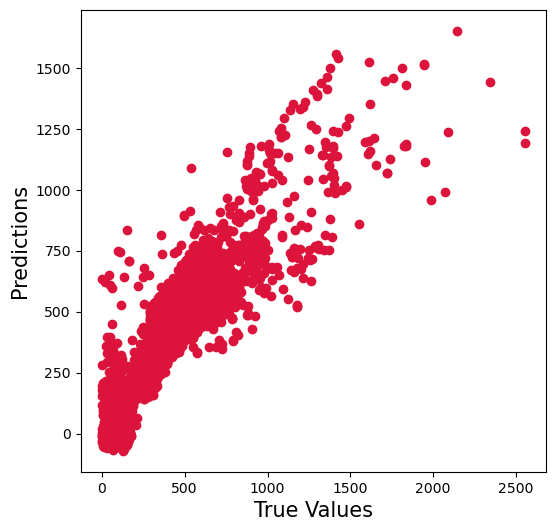

In [28]:
# Model prediction
X_test_scaled = scaler.transform(X_test)
y_test_pred = pd.DataFrame(model.predict(X_test_scaled),columns = ['total_claim_amount'] )      # model prediction
y_train_pred =  pd.DataFrame(model.predict(X_train_scaled),columns = ['target_d'])

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, c='crimson')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)


# Wednesday (01.02.23)

In [29]:
# Model Evaluation: MSE
mse_test = mse(y_test,y_test_pred) 
mse_train = mse(y_train,y_train_pred) 
print(mse_test) # MSE between the predicted Y test and the actual Y test
print(mse_train) # MSE between the predicted Y train and the actual Y train

20686.46227067887
19225.89940870449


In [30]:
# Model Evaluation: RMSE
import math
print(math.sqrt(mse_test)) # RMSE between the predicted Y test and the actual Y test
print(math.sqrt(mse_train)) # RMSE between the predicted Y train and the actual Y train

143.8278911431259
138.65748955142845


In [31]:
# Model Evaluation: MAE
mae_test = mae(y_test,y_test_pred) 
mae_train = mae(y_train,y_train_pred) 
print(mae_test) # MAE between the predicted Y test and the actual Y test
print(mae_train) # MAE between the predicted Y train and the actual Y train

96.859705303082
95.05439881232445


In [32]:
# Model Evaluation: R2
R2_test=r2_score(y_test,y_test_pred) # R2 score between the predicted Y test and the actual Y test
R2_train=r2_score(y_train,y_train_pred) # R2 score between the predicted Y train and the actual Y train
print(R2_test) 
print(R2_train)

0.7650929737533811
0.7725008392100021


In [33]:
# Model Evaluation: Adjusted R2
Adj_R2_test= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) # len(y_test) = number of samples for the test set, X_test.shape[1] = the number of independent variables for the test set
Adj_R2_train= 1 - (1-R2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(Adj_R2_test) 
print(Adj_R2_train)

0.7602317968332823
0.7705068471049118


In [34]:
# Feature importance: based on the coefficient/slope of our model, i.e., model.coef_
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
48,renew_offer_type_offer1,1.228678e+15
49,renew_offer_type_offer2,1.157497e+15
34,marital_status_married,1.061092e+15
56,vehicle_class_four-door car,9.738310e+14
35,marital_status_single,9.639477e+14
...,...,...
6,number_of_policies,1.492145e+00
0,customer_lifetime_value,9.830192e-01
3,months_since_last_claim,9.179001e-01
4,months_since_policy_inception,4.091584e-01


ValueError: shape mismatch: objects cannot be broadcast to a single shape

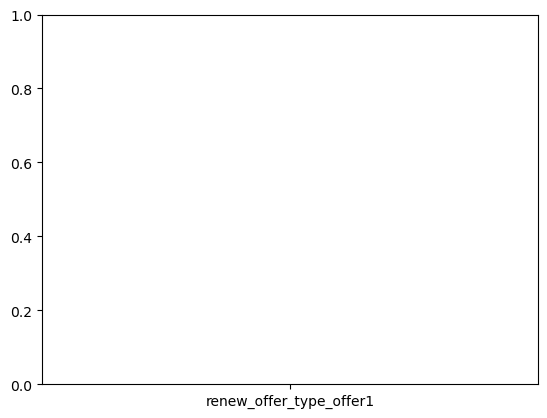

In [36]:
# Feature importance modeling
plt.bar(x=features_importances['Attribute'].iloc[-1], height=features_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()